# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


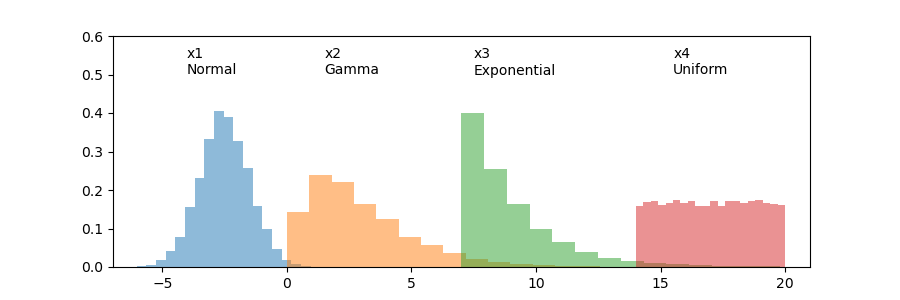

Text(15.504278042422595, 0.5, 'x4\nUniform')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Command to have interactive graphs in Jupyter notebook
%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5)
plt.axis([-7,21,0,0.6])

# Print text above each histogram
plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

# Animation

<IPython.core.display.Javascript object>


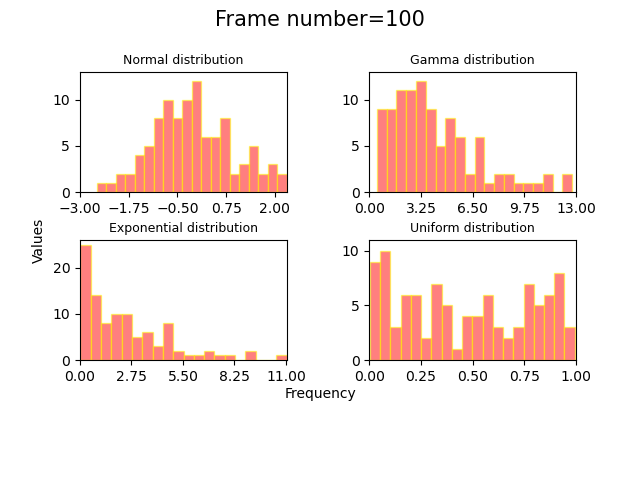

In [376]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from matplotlib.widgets import Slider, Button, RadioButtons

# Command to have interactive graphs in Jupyter notebook
%matplotlib notebook



### 0- Lets generate some data

n = 100

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
d1 = np.random.normal(0, 1, n)
d2 = np.random.gamma(2, 2, n)
d3 = np.random.exponential(2, n)
d4 = np.random.uniform(size=n)


# Generate a list with all the distributions
dists = [d1,d2,d3,d4]
nombres = ['Normal', 'Gamma', 'Exponential', 'Uniform']


### 1- Creates the Figure and its 4 subplots/axes

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
# Sets the spacing between subplots
plt.subplots_adjust(bottom=0.25, right=0.9, top=0.85, wspace=0.4, hspace=0.4)
# Adds common names to the x and y axis of the whole figure
fig.text(0.5, 0.17, 'Frequency', ha='center')
fig.text(0.05, 0.5, 'Values', va='center', rotation='vertical')


### 2- Lets create a function that will update the plots

def update(frame):
    # check if animation is at the last frame, and if so, stop the animation a
    if frame == n: 
        myanimation.event_source.stop()
    
       
    # For every distribution/pot/axes   
    for ax,dist,nombre in zip(fig.get_axes(),dists, nombres):
        
        # Defines the number of bines to be graphed
        bines=20
        
        # Clear axes of every subplot
        ax.cla()
        
        ### 
        # In order to avoid resizing of the axes during the animation we can fix x and y axis
        # 1st calculate the bins and its frequencies for each distribution to later set x and y limits
        frequency, bins = np.histogram(dist, bins=bines)   
        
        # 2nd use bins and frequency to set x and y limits
        ax.set_xlim(bins.min(),bins.max())
        ax.set_ylim(0, max(frequency)+1)
        ###
        
        # Plots each distribution according to the number of frame
        ax.hist(dist[:frame], bins=bines, color='r', alpha=0.5, edgecolor='yellow')
        # Sets the title of each subplot/axes
        ax.set_title(f'{nombre} distribution', loc='center', size=9)
        
        # Defines the same number of 5 xticks for every axes according to the values given by the bins
        ax.set_xticks(np.linspace(round(bins.min()), round(bins.max()), 5))        
    
        # Adds to the Figure a title
        fig.suptitle(f'Frame number={frame}', fontsize=15)
    
### 3- Lets create the animation
myanimation = animation.FuncAnimation(fig, update, frames=None, interval=10)



# Bonus section
I use a the slider widget from Matplotlib

<IPython.core.display.Javascript object>


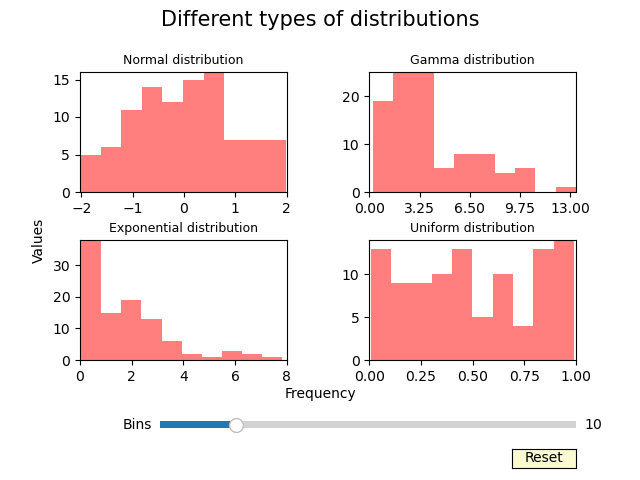

0

In [377]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from matplotlib.widgets import Slider, Button, RadioButtons

# Command to have interactive graphs in Jupyter notebook
%matplotlib notebook



### 0- Lets generate some data

n = 100

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
d1 = np.random.normal(0, 1, n)
d2 = np.random.gamma(2, 2, n)
d3 = np.random.exponential(2, n)
d4 = np.random.uniform(size=n)


# Generate a list with all the distributions
dists = [d1,d2,d3,d4]
nombres = ['Normal', 'Gamma', 'Exponential', 'Uniform']



#### Widget section ####

### 1- Generate the 4 plots, one for each distribution

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
# Sets the spacing between subplots
plt.subplots_adjust(bottom=0.25, right=0.9, top=0.85, wspace=0.4, hspace=0.4)


# Defines the number of bines to be graphed
bines_init=10

for ax,dist,nombre in zip(fig.get_axes(),dists, nombres):
        # Clear axes of every subplot
        #ax.cla()

        ### 
        # In order to avoid resizing of the axes during the animation we can fix x and y axis
        # 1st calculate the bins and its frequencies for each distribution to later set x and y limits
        frequency, bins = np.histogram(dist, bins=bines_init)   

        # 2nd use bins and frequency to set x and y limits
        ax.set_xlim(bins.min(),bins.max())
        ax.set_ylim(0, max(frequency))
        ###

        # Plots each distribution according to the number of frame
        ax.hist(dist, bins=bines_init, color='r', alpha=0.5)
        # Sets the title of each subplot/axes
        ax.set_title(f'{nombre} distribution', loc='center', size=9)

        # Defines the same number of 5 xticks for every axes according to the values given by the bins
        ax.set_xticks(np.linspace(round(bins.min()), round(bins.max()), 5))

# Adds to the Figure a title
fig.suptitle(f'Different types of distributions', fontsize=15)
# Adds common names to the x and y axis of the whole figure
fig.text(0.5, 0.17, 'Frequency', ha='center')
fig.text(0.05, 0.5, 'Values', va='center', rotation='vertical')
    


### 2- Add sliding bar in the bottom

# Generate two new axes and define their positions
axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)

# Generate the slider in the previously generated axes
# We also define the values from 1-50 with "valstep" argument
sfreq = Slider(axfreq, 'Bins', valmin=1, valmax=50, valinit=bines_init, valstep=[x for x in range(1,51)])



### 3- Generate the function that will update the figure upon changes in the slider
def update(val):
    freq = sfreq.val
    for ax,dist in zip(fig.get_axes()[0:4], dists):
        ax.cla()
        ax.hist(dist, bins=freq, color='r', alpha=0.5)
        
# When the slider values are changed the update function is called      
sfreq.on_changed(update)


### 4- Create a button that resets everything to the original bin=10

# Creates an axes and put a class button there
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

# Function that defines what happens when you click the button 
def reset(event):
    sfreq.reset()
button.on_clicked(reset)
